#  Droping out from school

- Wrangling the data
- Understanding the data + Correlations
- Summary 

from : https://www.kaggle.com/datasets/komalkhetlani/out-of-school-rates-global-data 

### By : Yuval Bar-On

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import shapefile as shp

<div>
<img src="https://github.com/YuvalBaron1997/project/blob/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%201.jpg?raw=true"  width = "500"/>
</div>

In [3]:
url = 'https://raw.githubusercontent.com/YuvalBaron1997/project/main/Primary.csv'
sr_df = pd.read_csv(url, encoding = 'latin1')
s = sr_df.copy()
s.head()

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Data source,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,37.0,47.0,28.0,42.0,19.0,42.0,47.0,46.0,32.0,16.0,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,2.0,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,DHS 2017-18,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,MICS 2012-13,2013.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,22.0,22.0,21.0,35.0,14.0,39.0,33.0,19.0,12.0,5.0,DHS 2015-16,2016.0


## 1. Wrangling the data:

- Treat missing values 
- Treat column names 
- Treat data types 

### Treat missing values

Check if there are missing values:

In [4]:
s.isnull().sum().sort_values(ascending=False)

Richest_Wealth quintile    99
Fourth_Wealth quintile     99
Middle_Wealth quintile     99
Second_Wealth quintile     99
Poorest_Wealth quintile    99
Rural_Residence            93
Urban_Residence            93
Data source                90
Time period                90
Male                       90
Female                     90
Total                      90
Sub-region                  2
Region                      2
Countries and areas         0
Development Regions         0
ISO3                        0
dtype: int64

lets see now what are the types:

In [5]:
s.dtypes

ISO3                        object
Countries and areas         object
Region                      object
Sub-region                  object
Development Regions         object
Total                      float64
Female                     float64
Male                       float64
Rural_Residence            float64
Urban_Residence            float64
Poorest_Wealth quintile    float64
Second_Wealth quintile     float64
Middle_Wealth quintile     float64
Fourth_Wealth quintile     float64
Richest_Wealth quintile    float64
Data source                 object
Time period                float64
dtype: object

In [6]:
sr =s.dropna(axis = 0, thresh = None, subset = None, inplace=False)
sr.head()

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Data source,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,37.0,47.0,28.0,42.0,19.0,42.0,47.0,46.0,32.0,16.0,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,2.0,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,DHS 2017-18,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,MICS 2012-13,2013.0
4,AGO,Angola,SSA,ESA,Least Developed,22.0,22.0,21.0,35.0,14.0,39.0,33.0,19.0,12.0,5.0,DHS 2015-16,2016.0
7,ARG,Argentina,LAC,LAC,Less Developed,1.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,MICS 2011-12,2012.0


We drop a lot of cuntrries becouse saddly thers is no data at all about them. and it isnt effect the real data

### change values

make us to use them and understand better

In [7]:
sr=sr.sort_values(by=['Time period'])

In [8]:
sr['Time period'] = sr['Time period'].astype(int).copy()

In [9]:
sr.rename(columns = {'Time period':'year'}, inplace = True)

sr.dropna(axis = 0, thresh = None, subset = None, inplace=False)

## 2. Understanding the data + Correlations:

- Treat missing values (if needed)
- Treat column names (if needed)
- Treat data types (if needed)
- Treat any other weird thing your data might have

### Correlations

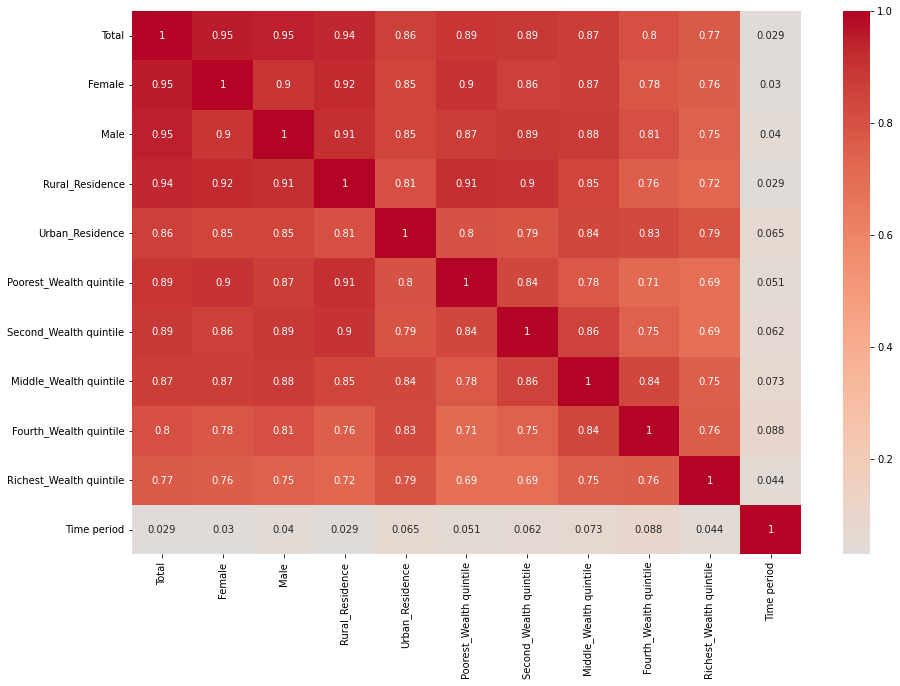

In [56]:
corrs = sr_df.corr(method = 'kendall')

plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

We can tell that there is a diffrent connection between the locations

In [11]:
D = sr.pivot_table(['Rural_Residence','Urban_Residence'],'Total') 
D['Total'] = sr['Total']
D.head()

,Rural_Residence,Urban_Residence,Total
Total,,,
0.0,0.400000,0.200000,37.0
1.0,0.947368,0.736842,2.0
2.0,2.363636,1.727273,2.0
3.0,3.090909,3.090909,NaN
4.0,4.500000,3.333333,22.0


In [12]:
sr['Development Regions'].value_counts()

Less Developed     53
Least Developed    41
More Developed      8
Name: Development Regions, dtype: int64

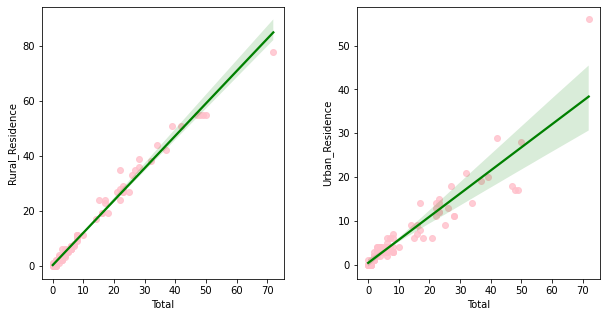

In [13]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.regplot(x='Total',y='Rural_Residence', data=sr, scatter_kws={"color": "Pink"}, line_kws={"color": "Green"}, ax = ax[0])
sns.regplot(x='Total',y='Urban_Residence', data=sr, scatter_kws={"color": "Pink"}, line_kws={"color": "Green"}, ax = ax[1])
plt.subplots_adjust(wspace = 0.3)


>##### Observation 1:
>
>The corrolation across locations is quite high, between reading and rural residence is near perfect.

Let's see about development

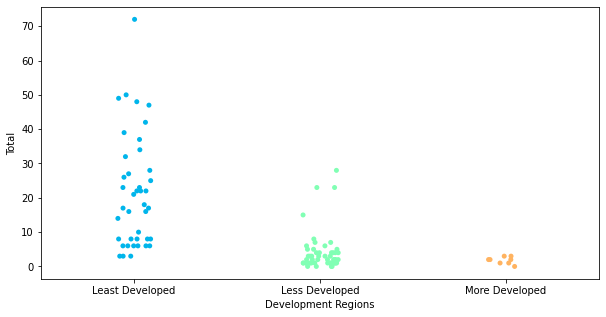

In [51]:
plt.figure(figsize=(10,5))
sns.stripplot(x="Development Regions", y="Total", data=sr ,palette="rainbow", jitter = 0.10)
plt.show()

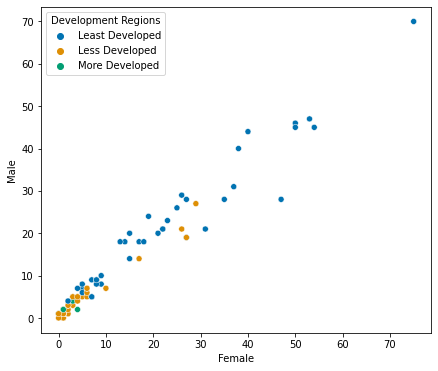

In [55]:
plt.figure(figsize=(7,6))
ax = sns.scatterplot(data=sr, x="Female", y="Male", hue = 'Development Regions', palette = 'colorblind')
plt.show()

In [19]:
g = sr.pivot_table(['Female','Male'],'Development Regions') 
g['Development Regions']=['Least Developed','Less Developed','More Developed']
g

,Female,Male,Development Regions
Development Regions,,,
Least Developed,22.024390,21.097561,Least Developed
Less Developed,4.075472,3.981132,Less Developed
More Developed,1.625000,2.000000,More Developed


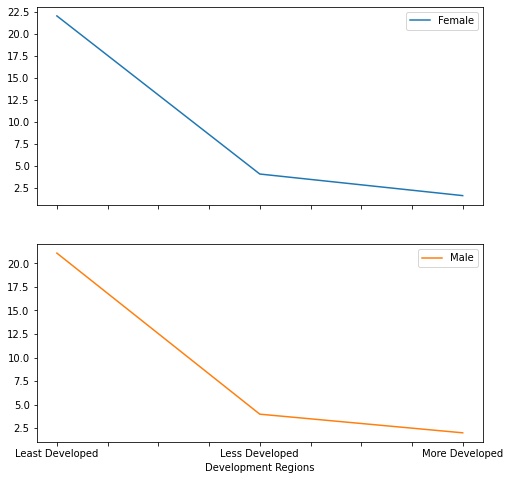

In [22]:
g.plot(subplots=True, figsize=(8, 8)); plt.legend(loc='best')

>##### Observation 2:
>
>The more the country is developing the less students drop off school ,the surprising thing is that the distribution by gender is kund off the samr for man and woman

What about the influence by the years?
for all the world

In [23]:
i = sr.pivot_table(['Total','Poorest_Wealth quintile','Second_Wealth quintile','Middle_Wealth quintile','Fourth_Wealth quintile','Richest_Wealth quintile'],'year') 
i

,Fourth_Wealth quintile,Middle_Wealth quintile,Poorest_Wealth quintile,Richest_Wealth quintile,Second_Wealth quintile,Total
year,,,,,,
2010,31.500000,39.750000,53.000000,17.500000,47.250000,38.500000
2011,5.666667,9.000000,13.000000,1.666667,11.000000,8.000000
2012,5.363636,6.909091,10.636364,2.909091,8.181818,7.090909
2013,7.500000,9.375000,16.125000,3.875000,11.625000,9.875000
2014,1.916667,2.583333,8.500000,1.000000,5.583333,4.250000
2015,17.777778,22.777778,29.000000,9.111111,25.666667,21.444444
2016,5.571429,7.928571,17.214286,2.785714,11.857143,9.500000
2017,3.333333,5.000000,15.111111,2.444444,8.111111,7.222222
2018,5.500000,8.909091,20.454545,3.227273,12.863636,10.818182


<AxesSubplot:>

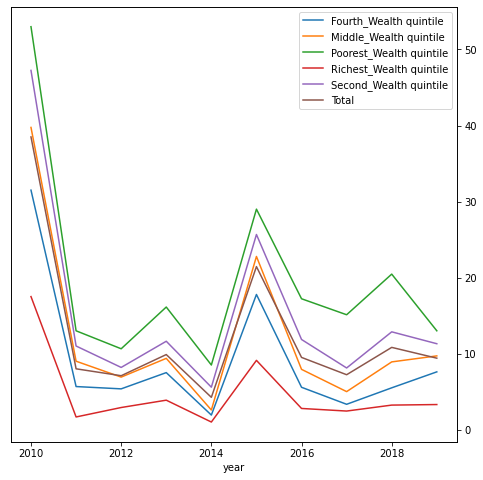

In [41]:
i.plot(secondary_y=['Total','Poorest_Wealth quintile','Second_Wealth quintile','Middle_Wealth quintile','Fourth_Wealth quintile','Richest_Wealth quintile'], mark_right=False, figsize=(8, 8))

In [25]:
#טקסט על השנים האלו

in 2010 there is decrease of the childern presnt of dropping out school. which mean is good.
in 2014 it's raising 

>##### Observation 3:
>
>We can tell that that the more reach you are the less children dropping of school.
but - when something append in the world its effect all off us 

## 3. summary:

- Treat missing values 
- Treat column names 
- Treat data types 

### Treat missing values

Check if there are missing values:

In [27]:
j = sr.pivot_table(['Total'],'Region') 
j['Region']=['East Asia and the Pacific','Europe and Central Asia','Latin America and the Caribbean','Middle East and North Africa','South Asia','Sub-Saharan Africa']
j

,Total,Region
Region,,
EAP,4.272727,East Asia and the Pacific
ECA,1.866667,Europe and Central Asia
LAC,2.250000,Latin America and the Caribbean
MENA,6.142857,Middle East and North Africa
SA,11.125000,South Asia
SSA,20.902439,Sub-Saharan Africa


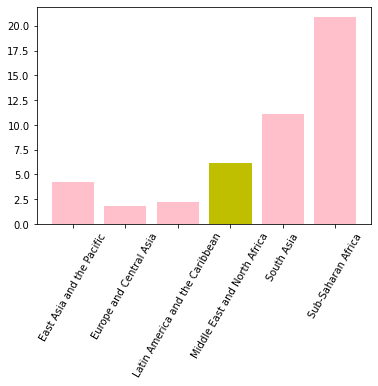

In [40]:
barlist=plt.bar('Region','Total',width=0.8,color = 'pink', data=j)
barlist[3].set_color('y')
plt.xticks(rotation = 60)
plt.show()

5 facts :

1. A high-school dropout is ineligible for 90% of jobs in America.

2. A high school dropout will earn $200,000 less than a high school graduate over his lifetime. And almost a million dollars less than a college graduate.

3. In the U.S., high school dropouts commit about 75% of crimes.

4. due the covid-19 half of million kuds in Israel started the proceses of dropping out from school

5. The main resonse:

<div>
<img src="https://github.com/YuvalBaron1997/project/blob/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%202.png?raw=true"  width = "500"/>
</div>